# Seattle and Global Weather Trend Analysis

## Import Packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure that the plots will be visible in the notebook

%matplotlib inline

---

### SQL Queries

##### Query 1 

<code> SQL

    SELECT *
    FROM   city_data
    WHERE  city like 'Seattle';
</code>


##### Query 2

<code> SQL 
    
    SELECT *
    FROM   global_data;
</code>

### Preparing the Data 

In [2]:
# Load the CSVs into a dataframe


# Global Data CSV
global_df = pd.read_csv('global-data-trends.csv')

# Seattle Data CSV
seattle_df = pd.read_csv('seattle-weather-trends.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'global-data-trends.csv'

In [ ]:
seattle_df

In [ ]:
# Changing the columns to make analysis and plotting simpler 



################
##SEATTLE##
################

seattle_df = seattle_df.drop(['country', 'city'], axis=1)

seattle_df.columns = ['year', 'seattle_temp']


################
##Global##
################

global_df.columns = ['year', 'global_temp']

Merge the dataframes into 1

In [3]:
merged_df = pd.merge(left=global_df, 
                     right=seattle_df, 
                     left_on='year', 
                     right_on='year')

# Variables for the the first line graph 
year = merged_df['year']                  # X-Axis Variable  

seattle_temp = merged_df['seattle_temp']  # Y-Avis Variable 
global_temp = merged_df['global_temp']    # Y-Axis Variable

NameError: name 'global_df' is not defined

In [4]:
merged_df

NameError: name 'merged_df' is not defined

Line Graph without the Moving Average Column

In [5]:
plt.plot(year, seattle_temp, label='Seattle Average Temp per year')
plt.plot(year, global_temp, label='Global Average Temp per yer')

plt.xlabel('Years')
plt.ylabel('Temperature in Degrees Celcius')

plt.title('Average Temperature Comparison')

plt.legend()
plt.show()

NameError: name 'year' is not defined

---

Create the Moving Average Column for Seattle Weather

In [6]:
#Isolate  the Seattle Temperature into a Pandas Series 
seattle_series = merged_df['seattle_temp']

################################
##Calculate the Moving Average##
################################



### Sum Every 6th Column
seattle_sum = seattle_series.groupby(seattle_series.index // 6).sum()

### Find the Average of the sums 
seattle_moving_avg = seattle_sum / 6

### Round the the nearest 2nd decimal place
seattle_moving_avg = seattle_moving_avg.round(decimals=2)

NameError: name 'merged_df' is not defined

Create the Moving Average Column for Global Weather

In [7]:
#Isolate  the Global Temperature into a Pandas Series 
global_series = merged_df['global_temp']

################################
##Calculate the Moving Average##
################################



### Sum Every 6th Column
global_sum = global_series.groupby(global_series.index // 6).sum()

### Find the Average of the sums 
global_moving_avg = global_sum / 6

### Round the the nearest 2nd decimal place
global_moving_avg = global_moving_avg.round(decimals=2)

NameError: name 'merged_df' is not defined

In [8]:
# Create a list to index the columns by
year_list = [x for x in range(1825,2006,6)]

sea_df = pd.DataFrame(seattle_moving_avg)
glo_df = pd.DataFrame(global_moving_avg)

# Add the new years list columns to their respective dataframes 

sea_df['years'] = pd.Series(year_list, index = sea_df.index)

glo_df['years'] = pd.Series(year_list, index = glo_df.index) 

# Now change the index to the new column I just added

sea_df = sea_df.set_index(sea_df['years'])

glo_df = glo_df.set_index(glo_df['years'])

# Now drop the extra columns from each of the DataFrames 

sea_df = sea_df.drop(columns=['years'])
glo_df = glo_df.drop(columns=['years'])

NameError: name 'seattle_moving_avg' is not defined

In [11]:
# Set the Variables for the next Graph

axis_list = [x for x in range(1825,2006,6)]

sea_move_df = sea_df['seattle_temp'] # Y Variable
glo_move_df = glo_df['global_temp']  # Y Variable 

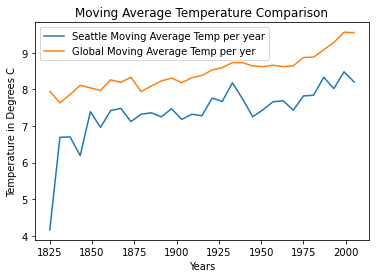

In [12]:
plt.plot(axis_list, sea_move_df, label='Seattle Moving Average Temp per year')
plt.plot(axis_list, glo_move_df, label='Global Moving Average Temp per yer')

plt.xlabel('Years')
plt.ylabel('Temperature in Degrees C')

plt.title('Moving Average Temperature Comparison')


plt.legend()
plt.show()

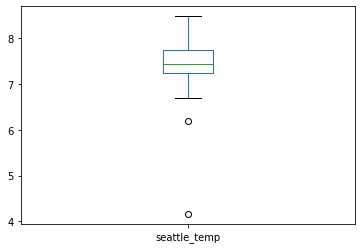

In [13]:
# Plot a box graph to show how the data is spread

sea_df['seattle_temp'].plot(kind='box');

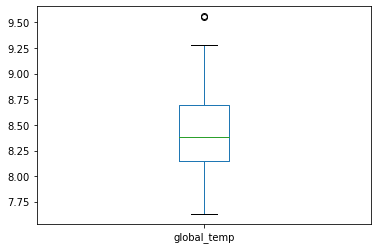

In [14]:
# Plot a box graph to show how the data is spread

glo_df['global_temp'].plot(kind='box');

### Observations

<ol>
    <li>Both Seattle and the global average temperature is going up over time.</li>
    <li>The global temperature is higher that the temperature in seattle on average.</li>
    <li>Seattle's average temperature has had the most variance from 4 to roughly 8 degrees.</li>
    <li>Seattle has 2 outliers in the data set and the global data has 1. </li>
</ol>    